Exploratory Data Analysis: SARIMA and SARIMAX

(158.0, 217.0)

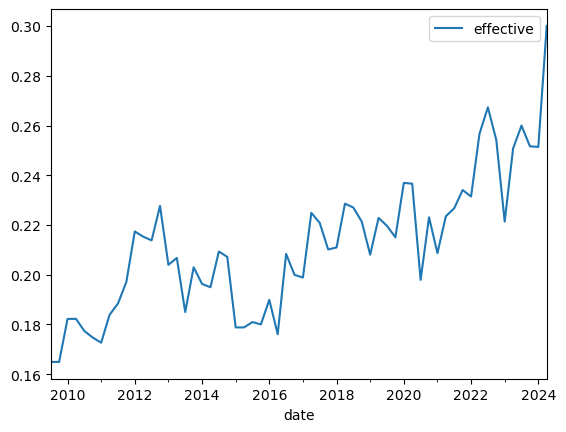

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#plotting the temperature
#load in the excel sheet
df = pd.read_excel('/Users/ashleyyang/Desktop/acep/final_data/quarter.xlsx')
#plot the column 'Temperature'
df.plot(x='date', y= 'effective')
plt.xlim()

<Axes: title={'center': 'Effective, Fuel, Utility Rates ($/kwh) '}, xlabel='date'>

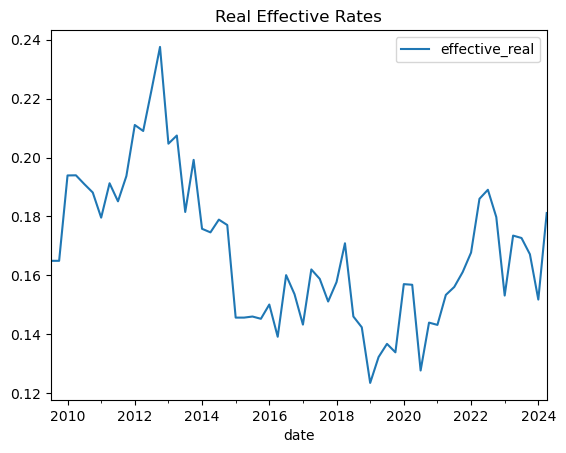

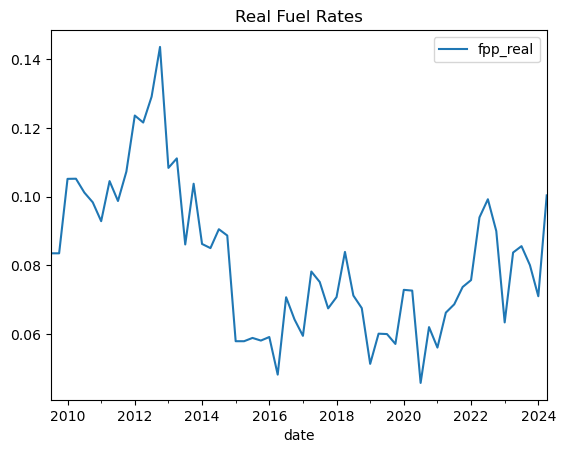

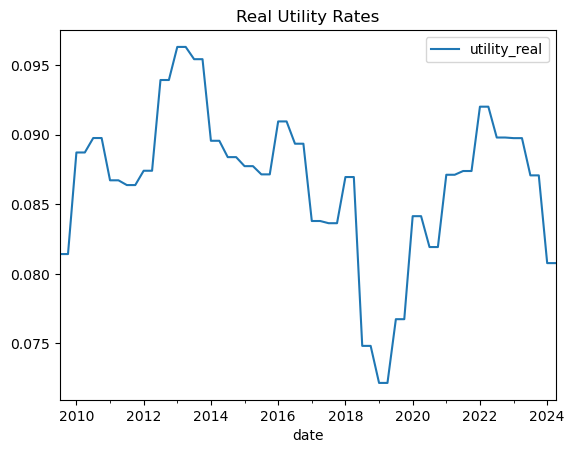

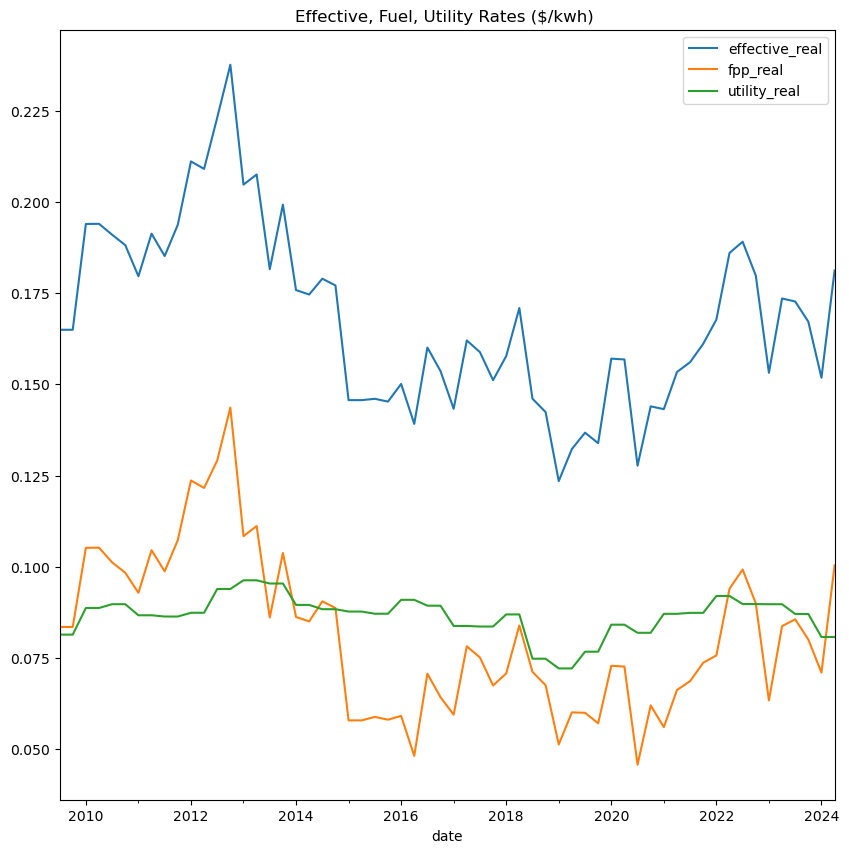

In [2]:
#plot both minimum temperature and effective rates on same graph
df.plot(x='date', y='effective_real', title = 'Real Effective Rates')
df.plot(x='date', y = 'fpp_real', title = "Real Fuel Rates")
df.plot(x= 'date',  y = 'utility_real', title = 'Real Utility Rates')

#plot all the rates on the same graph
df.plot(x="date", y=["effective_real", "fpp_real", "utility_real"],
        kind="line", title = "Effective, Fuel, Utility Rates ($/kwh) ", figsize=(10, 10))
 



In [3]:
display(df.head())

,date,fpp,effective,min_temp_min,min_temp_mean,crude_oil_prod,nat_gas_prices,dfo,rfo,sub,...,crude_prices,oil,popul,CPI_new,effective_real,nat_gas_real,perc_change,fpp_real,utility_real,crude_prices_real
0,2009-09-01,0.08352,0.16494,22,38.766667,54373,9.240000,121.542,7968.890,0.0,...,65.270000,34359.565,95890,100.000000,0.164940,9.240000,0.000000,0.083520,0.081420,65.270000
1,2009-12-01,0.08352,0.16494,-36,0.664516,60594,9.566667,512.350,61311.265,0.0,...,69.056667,164651.803,95890,100.000000,0.164940,9.566667,0.000000,0.083520,0.081420,69.056667
2,2010-03-01,0.09886,0.18223,-41,-11.643241,57646,8.866667,735.396,76330.823,0.0,...,71.513333,176027.997,98272,93.970510,0.193923,9.435584,0.175716,0.105203,0.088719,76.101889
3,2010-06-01,0.09890,0.18227,9,39.873477,52921,8.486667,378.425,37155.680,0.0,...,71.030000,105804.822,98272,93.970510,0.193965,9.031202,0.000220,0.105246,0.088719,75.587544
4,2010-09-01,0.09401,0.17738,14,46.275627,51993,8.590000,722.038,12441.320,0.0,...,68.530000,95400.721,98272,92.882954,0.190972,9.248199,-0.015434,0.101213,0.089758,73.781030


In [4]:
from statsmodels.tsa.stattools import adfuller

# Drop missing values from the 'Effective' column
effective_values = df['effective_real'].dropna()

result = adfuller(effective_values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    


ADF Statistic: -1.7741728736036955
n_lags: 0.3933574167161433
p-value: 0.3933574167161433
Critial Values:
   1%, -3.548493559596539
Critial Values:
   5%, -2.912836594776334
Critial Values:
   10%, -2.594129155766944


The p-value is not significant, meaning we fail to reject the null and the data is not stationary

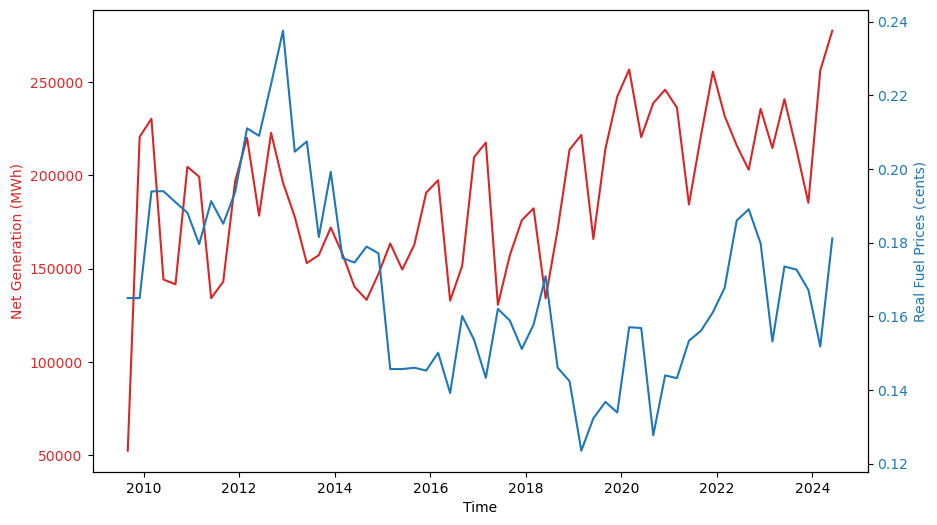

<Figure size 640x480 with 0 Axes>

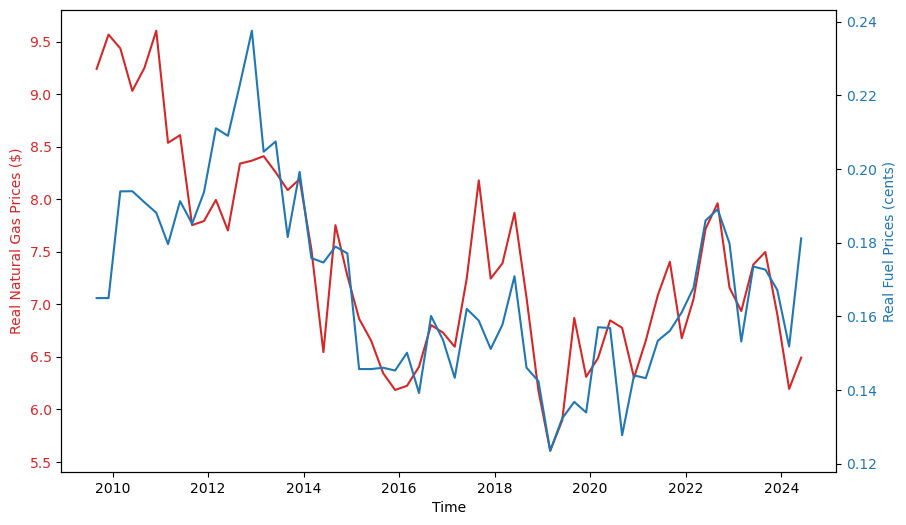

<Figure size 640x480 with 0 Axes>

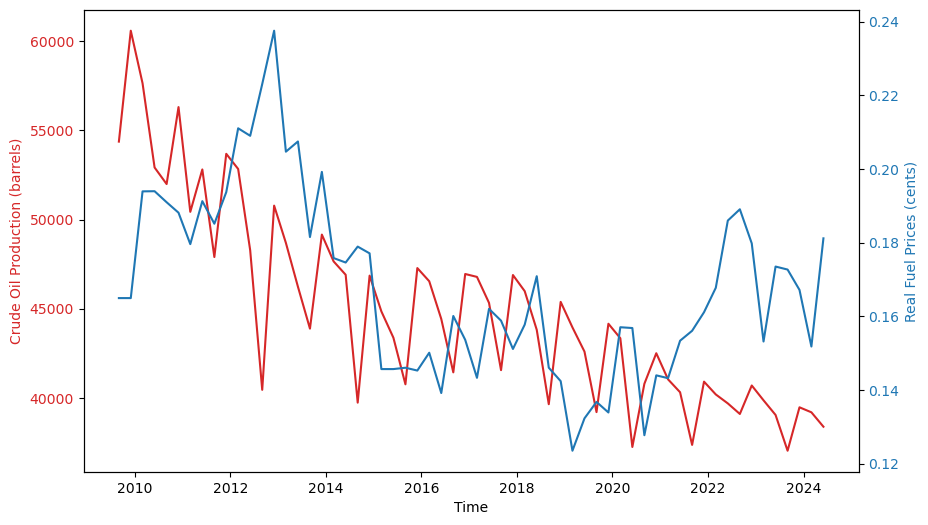

<Figure size 640x480 with 0 Axes>

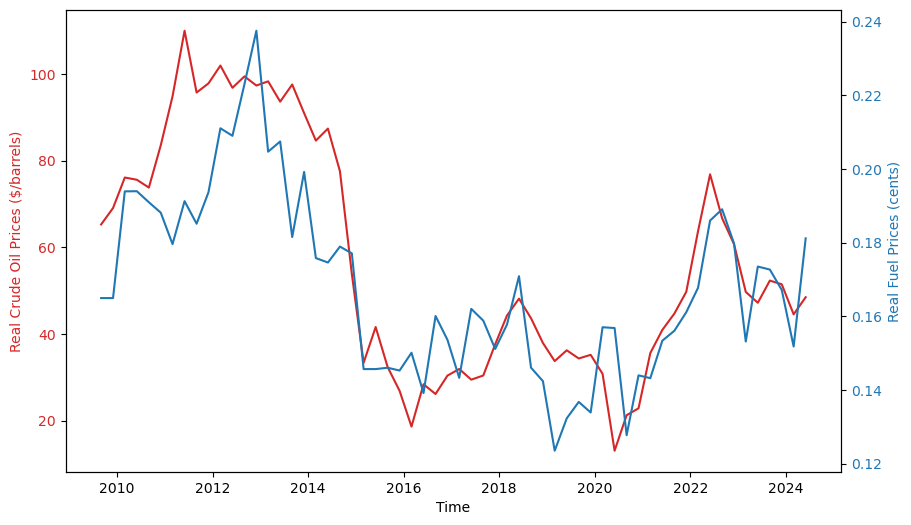

<Figure size 640x480 with 0 Axes>

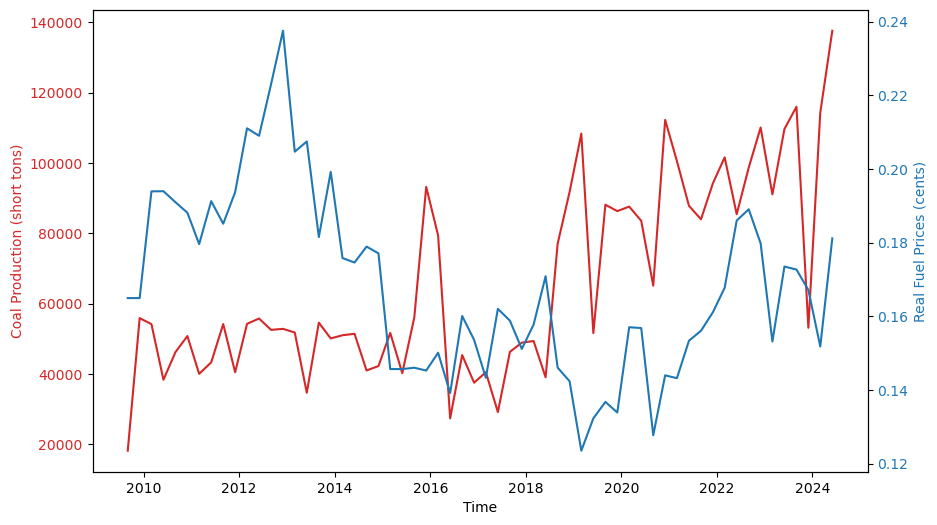

<Figure size 640x480 with 0 Axes>

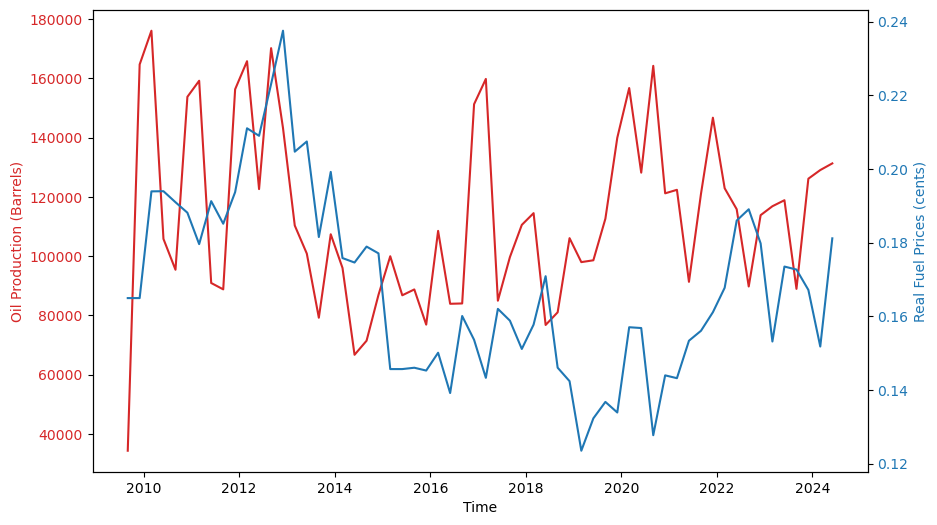

<Figure size 640x480 with 0 Axes>

In [5]:
#visualizations of factors and effective rates
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

#net gen
generation = df['net_gen']
prices = df['effective_real']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Net Generation (MWh)', color=color)
ax1.plot(generation, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

#nat_gas 
nat_gas = df['nat_gas_real']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Real Natural Gas Prices ($)', color=color)
ax1.plot(nat_gas, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

#crude oil 

crude = df['crude_oil_prod']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Crude Oil Production (barrels)', color=color)
ax1.plot(crude, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

#crude oil prices

crude = df['crude_prices_real']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Real Crude Oil Prices ($/barrels)', color=color)
ax1.plot(crude, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

#coal production
coal = df['coal']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Coal Production (short tons)', color=color)
ax1.plot(coal, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

#oil production

oil = df['oil']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Oil Production (Barrels)', color=color)
ax1.plot(oil, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

In [6]:
gen = df["net_gen"]
crude_prod = df["crude_oil_prod"]
coal  =df["coal"]
wind = df["wnd"]
oil = df["oil"]
popul = df["popul"]
crude_price  =df["crude_prices_real"]
nat_price = df["nat_gas_real"]
pricesF = df["fpp_real"]


print(gen.corr(pricesF))
print(crude_price.corr(pricesF))
print(nat_price.corr(pricesF))
print(wind.corr(pricesF)) #wind increase, prices decrease
print(oil.corr(pricesF)) #oil increase, prices increase
print(popul.corr(pricesF))
print(crude_prod.corr(pricesF)) #production increases, prices increase
print(coal.corr(pricesF)) #production increases, prices decrease

-0.10989375402942785
0.8557265123636403
0.7001573248465256
-0.5517377242546263
0.19386034096240337
0.1819688628831303
0.41358777522370666
-0.23382144431041815


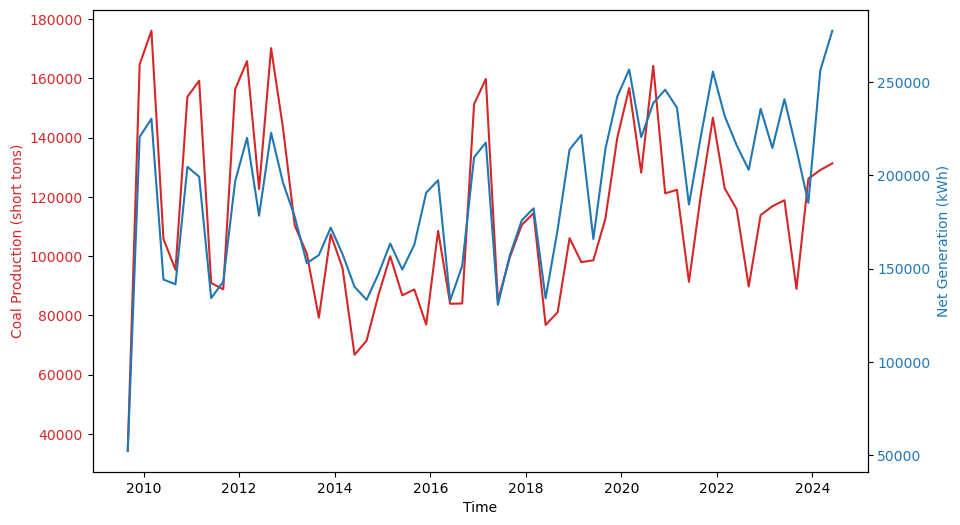

<Figure size 640x480 with 0 Axes>

In [7]:
#net generation graphed with coal production
#oil production

coal = df['coal']
net_gen = df['net_gen']
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Coal Production (short tons)', color=color)
ax1.plot(oil, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Net Generation (kWh)', color=color)
ax2.plot(net_gen, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
plt.tight_layout()

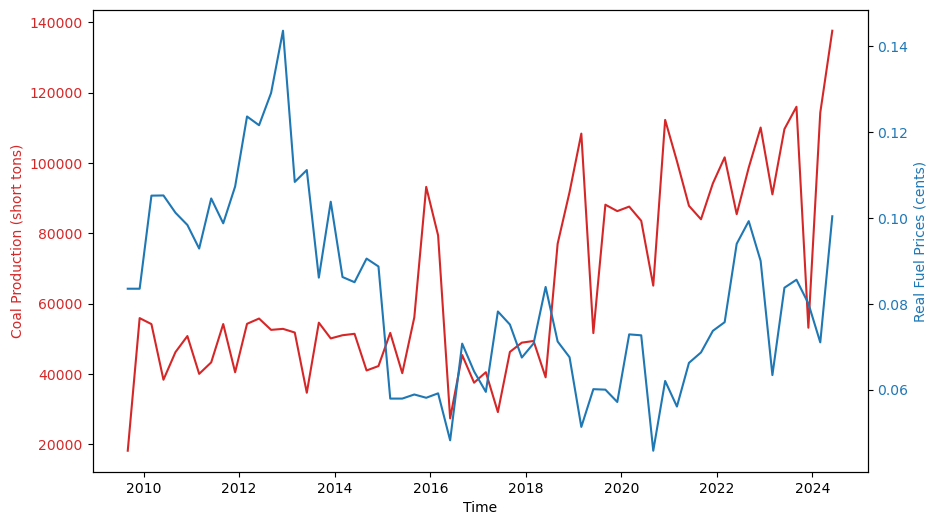

In [9]:
#plot coal production and prices
coal = df['coal']
prices = df['fpp_real']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Coal Production (short tons)', color=color)
ax1.plot(coal, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Real Fuel Prices (cents)', color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

As we can see, crude oil prices is most highly correlated, next is natural gas prices, and then wind generation, and crude oil production, etc. 
Net generation is surprisingly lowly correlated compared to the rest of the factors

Next, we will find correlations between fuel prices and possible predictors

In [10]:
gen = df["net_gen"]
crude_prod = df["crude_oil_prod"]
coal  =df["coal"]
wind = df["wnd"]
oil = df["oil"]
popul = df["popul"]
crude_price  =df["crude_prices_real"]
nat_price = df["nat_gas_real"]
pricesF = df["fpp_real"]

print(gen.corr(pricesF))
print(crude_price.corr(pricesF))
print(nat_price.corr(pricesF))
print(wind.corr(pricesF))
print(oil.corr(pricesF))
print(popul.corr(pricesF))
print(crude_prod.corr(pricesF))
print(coal.corr(pricesF))

-0.10989375402942785
0.8557265123636403
0.7001573248465256
-0.5517377242546263
0.19386034096240337
0.1819688628831303
0.41358777522370666
-0.23382144431041815


Stays relaively similar, since Fuel and Purchasing Price follows the same trend as Effective rates since the effective rate = fuel price + nonfuel price